In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import unicodedata

## Parte 2 -- Un mapa coropletográfico a nivel departamental (GeoPandas)

In [4]:
# 1) Cargamos shapefile departamental
shp = "../data/Departamental INEI 2023 geogpsperu SuyoPomalia.shp"  
gdf = gpd.read_file(shp)

In [6]:
# 2) Normalizamos texto (para unir por nombre de departamento) 
norm = lambda s: ''.join(c for c in unicodedata.normalize('NFD', str(s).upper().strip())
                         if unicodedata.category(c) != 'Mn')

# Intentamos detectar la columna de nombre de departamento en el shapefile
col_dep = next((c for c in gdf.columns if 'DEPART' in c.upper() or 'NOMB' in c.upper()), gdf.columns[0])
gdf['DEP_NORM'] = gdf[col_dep].apply(norm)

In [7]:
# 3) Conteo por departamento (si ya tienes conteo_departamentos, omite este bloque) 

df = pd.read_csv('../data/IPRESS.csv', encoding='latin-1')
df = df[df['Condición'] == 'EN FUNCIONAMIENTO']
conteo = (df.groupby('Departamento')['Nombre del establecimiento']
            .count().reset_index()
            .rename(columns={'Nombre del establecimiento':'Total_Hospitales_Operativos'}))
conteo['_DEP_NORM'] = conteo['Departamento'].apply(norm)

In [8]:
# 4) Unir shapefile + conteo 
gdf_m = gdf.merge(conteo, left_on='DEP_NORM', right_on='_DEP_NORM', how='left')
gdf_m['Total_Hospitales_Operativos'] = gdf_m['Total_Hospitales_Operativos'].fillna(0)
gdf_m = gdf_m.to_crs(epsg=4326)

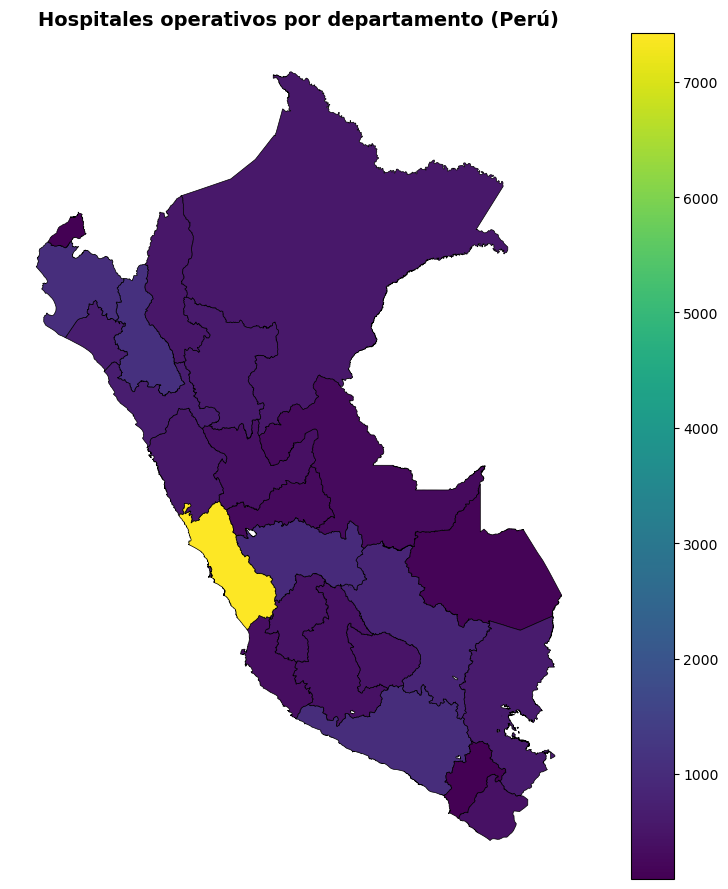

<Figure size 640x480 with 0 Axes>

In [10]:
#  5) Coroplético 

fig, ax = plt.subplots(figsize=(9,9))
gdf_m.plot(column='Total_Hospitales_Operativos',
           ax=ax, linewidth=0.5, edgecolor='black', legend=True)
ax.set_title("Hospitales operativos por departamento (Perú)", fontsize=14, fontweight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


# Guardamos imagen
#plt.savefig("mapa_coropletico_departamental.png", dpi=200, bbox_inches="tight")